In [3]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import fitsio

In [26]:
i3_fits=fitsio.FITS("/global/cscratch1/sd/troxel/finaly1cats/y1a1-im3shape_v5_matched_v6.fits")
mc_fits=fitsio.FITS("/global/cscratch1/sd/troxel/finaly1cats/mcal-y1a1-combined-riz-blind-v4-matched.fits")

In [27]:
mc_data=mc_fits[1].read_columns(['ra', 'dec',  'snr', 'R11', 'R22', 'flags_select', 'e1'])

In [ ]:
i3_data=i3_fits[1].read_columns(['ra', 'dec',  'snr', 'weight', 'flags_select', 'e1'])

In [11]:
i3_select=np.where(i3_data['flags_select']==0)
i3_snr = i3_data['snr'][i3_select]
i3_w = i3_data['weight'][i3_select]
i3_e1 = i3_data['e1'][i3_select]

In [29]:
mc_select=np.where(mc_data['flags_select']==0)
mc_snr = mc_data['snr'][mc_select]
mc_w =   0.5*(mc_data['R11'][mc_select]+mc_data['R22'][mc_select])
#mc_e1 =  mc_data['e1'][mc_select]

In [12]:
import scipy.stats

In [13]:
variances,edges,bins = scipy.stats.binned_statistic(i3_snr, i3_e1, np.var, bins=20)
mean_snr,edges2,bins2 = scipy.stats.binned_statistic(i3_snr, i3_snr, "mean", bins=20)

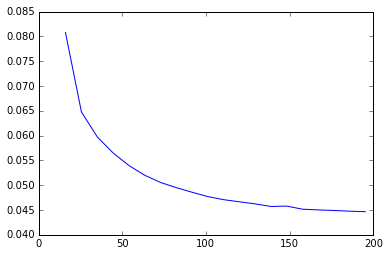

In [14]:
plot(mean_snr, variances)

In [15]:
sigma_sh2 = variances[-1]
w_sum = i3_w.sum()


In [30]:
import healpy
nside=1024
npix=healpy.nside2npix(nside)
Apix=healpy.nside2pixarea(nside, degrees=True)

i3_theta=np.radians(90-i3_data['dec'][i3_select])
i3_phi=np.radians(i3_data['ra'][i3_select])

mc_theta=np.radians(90-mc_data['dec'][mc_select])
mc_phi=np.radians(mc_data['ra'][mc_select])


def get_area(theta,phi):
    pix=healpy.ang2pix(nside,theta,phi)
    m=np.zeros(npix)
    m[pix]=1
    A=m.sum()*Apix*60**2
    return A

#i3_A = get_area(i3_theta, i3_phi)
mc_A = get_area(mc_theta, mc_phi)

In [32]:

i3_A, mc_A

(6082370.2266195705, 6298203.767259866)

In [20]:
n_eff_i3 = sigma_sh2 * w_sum / i3_A


In [21]:
print n_eff

2.91001962333


In [37]:
i3_w.sum()**2 / (i3_w**2).sum() / i3_A

3.7307514256942769

In [33]:
mc_w.sum()**2 / (mc_w**2).sum() / mc_A

3.5240875614075278

In [23]:
mc_fits=fitsio.FITS("/global/cscratch1/sd/troxel/finaly1cats/mcal-y1a1-combined-riz-blind-v4-matched.fits")

In [38]:
len(mc_w)/mc_A

5.531643510981139

In [39]:
len(i3_w)/i3_A

4.0513023840863998

In [40]:
mc_w.max()

62.770560015145477

(array([   41896.,    54928.,    72944.,    96457.,   125970.,   165690.,
          219426.,   288236.,   382827.,   508994.,   683988.,   916260.,
         1241042.,  1699421.,  2368685.,  3539150.,  5692281.,  6855973.,
         5831431.,  1875655.,   733696.,   399978.,   250715.,   168080.,
          116813.,    83595.,    60114.,    43371.,    31631.,    23748.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
         1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 30 Patch objects>)

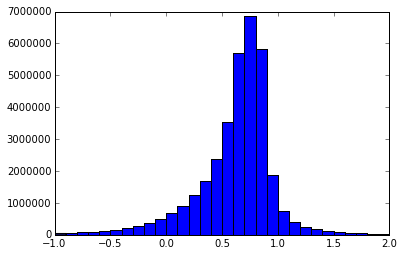

In [44]:
hist(mc_w, bins=30, range=(-1,2))

(array([ 1382559.,  2332818.,  2440261.,  2426326.,  2449759.,  2632253.,
         4066032.,  2386445.,  1446529.,  1039152.,   850632.,   445764.,
          165402.,   122544.,    92576.,    71711.,    56027.,    44452.,
           35750.,    29126.,    24093.,    20095.,    17109.,    14715.,
           12267.,    10443.,     8704.,     7031.,     5964.,     4982.]),
 array([  8.34049769,   9.73307214,  11.1256466 ,  12.51822106,
         13.91079552,  15.30336997,  16.69594443,  18.08851889,
         19.48109334,  20.8736678 ,  22.26624226,  23.65881672,
         25.05139117,  26.44396563,  27.83654009,  29.22911454,
         30.621689  ,  32.01426346,  33.40683792,  34.79941237,
         36.19198683,  37.58456129,  38.97713574,  40.3697102 ,
         41.76228466,  43.15485912,  44.54743357,  45.94000803,
         47.33258249,  48.72515694,  50.1177314 ]),
 <a list of 30 Patch objects>)

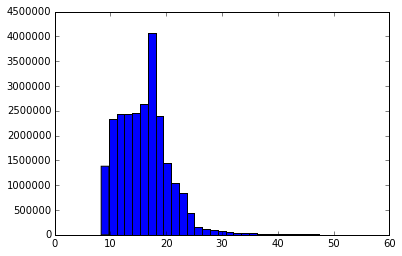

In [45]:
hist(i3_w, bins=30)

0